<a href="https://colab.research.google.com/github/Parth7/ML-for-finance/blob/main/image_classification_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

https://github.com/codebasics/deep-learning-keras-tf-tutorial/blob/master/16_cnn_cifar10_small_image_classification/cnn_cifar10_dataset.ipynb

In [ ]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data() #cifar dataset
X_train.shape

170500096/170498071 [==============================] - 2s 0us/step


(50000, 32, 32, 3)

In [ ]:
X_test.shape

(10000, 32, 32, 3)

In [ ]:
y_train.shape

(50000, 1)

In [ ]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [ ]:
y_train = y_train.reshape(-1,) # this is a great opearation to flatten the array. y_train is 2d array but with -1 we specify we want the same dimension along first axis and leave the other blank to specify flattening it
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [ ]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [ ]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

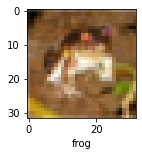

In [ ]:
plot_sample(X_train, y_train, 0)

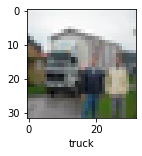

In [ ]:
plot_sample(X_train, y_train, 16)

In [ ]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [ ]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',  # use categorical when we categorise but here we are using a value hence we use sparse
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 8s 3ms/step - loss: 1.8120 - accuracy: 0.3532
Epoch 2/5
1563/1563 [==============================] - 5s 3ms/step - loss: 1.6218 - accuracy: 0.4271
Epoch 3/5
1563/1563 [==============================] - 5s 3ms/step - loss: 1.5403 - accuracy: 0.4581
Epoch 4/5
1563/1563 [==============================] - 5s 3ms/step - loss: 1.4817 - accuracy: 0.4791
Epoch 5/5
1563/1563 [==============================] - 5s 3ms/step - loss: 1.4326 - accuracy: 0.4976


In [ ]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.29      0.80      0.43      1000
           1       0.53      0.63      0.58      1000
           2       0.56      0.07      0.13      1000
           3       0.42      0.23      0.29      1000
           4       0.48      0.25      0.33      1000
           5       0.54      0.18      0.27      1000
           6       0.64      0.33      0.43      1000
           7       0.33      0.67      0.45      1000
           8       0.69      0.34      0.46      1000
           9       0.43      0.66      0.52      1000

    accuracy                           0.42     10000
   macro avg       0.49      0.42      0.39     10000
weighted avg       0.49      0.42      0.39     10000



In [ ]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [ ]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 61s 39ms/step - loss: 1.4529 - accuracy: 0.4806
Epoch 2/10
1563/1563 [==============================] - 59s 38ms/step - loss: 1.1152 - accuracy: 0.6096
Epoch 3/10
1563/1563 [==============================] - 59s 38ms/step - loss: 0.9820 - accuracy: 0.6578
Epoch 4/10
1563/1563 [==============================] - 59s 38ms/step - loss: 0.8953 - accuracy: 0.6905
Epoch 5/10
1563/1563 [==============================] - 60s 38ms/step - loss: 0.8269 - accuracy: 0.7103
Epoch 6/10
1563/1563 [==============================] - 59s 38ms/step - loss: 0.7677 - accuracy: 0.7327
Epoch 7/10
1563/1563 [==============================] - 59s 38ms/step - loss: 0.7148 - accuracy: 0.7499
Epoch 8/10
1563/1563 [==============================] - 60s 38ms/step - loss: 0.6670 - accuracy: 0.7668
Epoch 9/10
1563/1563 [==============================] - 61s 39ms/step - loss: 0.6186 - accuracy: 0.7834
Epoch 10/10
1563/1563 [==============================] - 59s 38m

In [ ]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.9236 - accuracy: 0.6922


[0.9235631823539734, 0.6922000050544739]

In [ ]:
y_pred = cnn.predict(X_test)
y_pred[:5]

array([[1.94733839e-05, 1.56676629e-06, 6.33786840e-04, 7.01346457e-01,
        1.80013070e-04, 3.21762078e-02, 9.51774791e-03, 9.66218181e-07,
        2.56119460e-01, 4.28311478e-06],
       [5.46882115e-03, 8.73324927e-03, 1.26015550e-07, 1.66466627e-08,
        4.52269955e-09, 6.43293085e-10, 6.50172138e-11, 1.01450237e-09,
        9.85605299e-01, 1.92397158e-04],
       [1.25195906e-01, 1.27327725e-01, 1.38146698e-03, 1.43626435e-02,
        9.11314413e-03, 2.01688590e-03, 1.30022143e-03, 6.75232103e-03,
        6.70361280e-01, 4.21883799e-02],
       [8.83300841e-01, 5.82824536e-02, 1.28769474e-02, 2.23650341e-03,
        8.76597408e-03, 5.24337484e-05, 6.40113867e-05, 1.48583611e-04,
        2.75415666e-02, 6.73070084e-03],
       [6.59453008e-06, 9.00734631e-06, 2.71494016e-02, 2.94832736e-02,
        1.02480024e-01, 1.36295205e-03, 8.39467049e-01, 1.42797253e-05,
        1.58524999e-05, 1.14841305e-05]], dtype=float32)

In [ ]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 6]

In [ ]:
y_test = y_test.reshape(-1,)
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

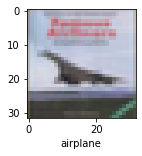

In [ ]:
plot_sample(X_test, y_test,3)

In [ ]:
classes[y_classes[3]]

'airplane'

In [ ]:
classes[y_classes[3]]

'airplane'